# BREAST CANCER

Breast cancer is one of the most prevalent diseases among women in the World. According to US Cancer Statistics Working Group (2015), after lung cancer, it is second leading cause of death among women. In addition, the World Health Organization indicates that 2.09 million people are diagnosed with breast cancer every year. In the same vein, IARC’s statistics present that nowadays, breast cancer is the world’s mostly commonly-diagnosed cancer and overtaken lung cancer. 


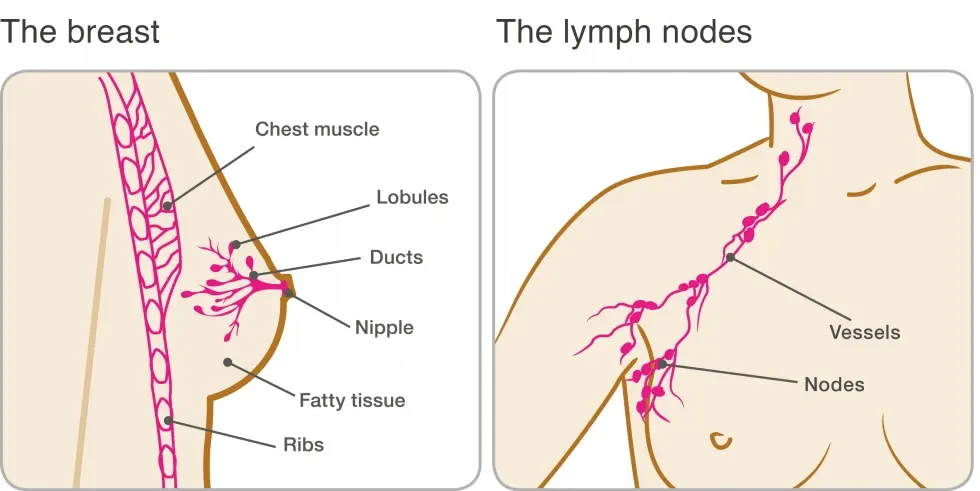

> ****TYPES OF BREAST CANCER****

There are several types of breast cancer (Sharma et al., 2010).

> Frequently occurring breast cancer includes:
* Lobular carcinoma in situ (LCIS, lobular neoplasia)
* Ductal carcinoma in situ (DCIS)
* Infiltrating ductal carcinoma

> Less commonly occurring breast cancer follows as:
* Medullary carcinoma
* Mutinous carcinoma
* Tubular carcinoma


> **CAUSES OF BREAST CANCER**
* A previous history of breast cancer
* Significant family history
* Genetic causes
* Hormonal causes
* Life style and dietary cause
* Environmental cause


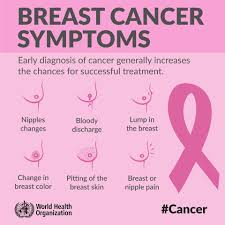
Source: World Health Organization (WHO)

* **Objective**

The aim of this study is to identify cancer by using ML. For this reason, the study shows a comparison of different ML on the dataset by measuring classification test accuracy values. 


# 1. IMPORT SOME NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

**Load Data**

In [ ]:
df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

# 2. UNDERSTANDING THE DATA-SET

>**The Dataset** 

In this study. The dataset, the Wisconsin Diagnostic Breast Cancer (WDBC)  was taken from from the Irvine Machine Learning Repository of the University of California (UCI).  It is an open-source and available at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 , https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.  The sample size of the dataset is 569 and consists of 32 variables.
Some of the variables’ characteristics included in the dataset follow as; 
1. radius [mean of distances from centre to points on the perimeter], 
2. texture [standard deviation of grey-scale values], 
3. perimeter, 
4. area, 
5. smoothness [local variation in radius lengths], 
6. compactness [ ((perimeter)2 / area) -1], 
7. concavity [severity of concave portions of the contour],
8. concave points [number of concave portions of the contour], 
9. symmetry, 
10. fractal dimension ["coastline approximation" - 1]



In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Both “id” and “Unamed: 32” features in dataset are useless. The features were dropped. 
df.drop(['id', 'Unnamed: 32'], axis=1,inplace = True)

In [ ]:
df.info()

In [ ]:
df.isnull().values.any()

In [ ]:
df.isnull().sum()

* There are no missing values in the dataset.

In [ ]:
df.shape

In [ ]:
df.describe().T

# 3. ANALYSIS of NUMERICAL VARIABLE

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variables: ', len(num_cols))
num_cols

**Visualization of numeric variables**

In [ ]:
def hist_for_nums(data, num_cols):
    col_counter = 0
    data = data.copy()
    for col in num_cols:
        data[col].hist(bins=30)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df, num_cols)

In [ ]:
# Visualization
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

# 4. ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

In [ ]:
df["diagnosis"].value_counts()

* Finding the number of values in the target column "diagnosis":
> * M = malignant ==> 1 (212)
> * B = benign    ==> 0 (357)

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df["diagnosis"].value_counts(),  labels=['no cancer','cancer'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

As seen from the values above, there is no imbalance between the classes of the dependent variable.

# 5. MODELING

I split the data set: 80% of the data is train, and 20% of it is test data.

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df[["diagnosis"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9)

# **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

**Model Tuning**

In [ ]:
# Model Tuning
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}


In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 


In [ ]:
rf_cv_model.fit(X_train, y_train)
print("The best parameters: " + str(rf_cv_model.best_params_))

**Final model**

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 2, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)
rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

#  LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier().fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

**Model Tuning**

In [ ]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

**Final model**

In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 5,
                       subsample = 0.6,
                       n_estimators = 2000,
                       min_child_samples = 5)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

**Model Tuning**

In [ ]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [ ]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

In [ ]:
gbm_cv.best_params_

**Final model**

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 500)
gbm_tuned =  gbm.fit(X_train,y_train)
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

# CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

**Model Tuning**

In [ ]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)
cart_cv_model.best_params_

**Final model**

In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

> **References**
* Sharma, G. N., Dave, R., Sanadya, J., Sharma, P., & Sharma, K. K. (2010). Various types and management of breast cancer: an overview. Journal of advanced pharmaceutical technology & research, 1(2), 109.
* US Cancer Statistics Working Group. (2015). United States cancer statistics: 1999–2012 incidence and mortality web-based report. Atlanta (GA): department of health and human services, centers for disease control and prevention, and national cancer institute.
